In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
from sodapy import Socrata

In [2]:
import requests

def send_message_to_telegram(message):
    chatId = '5303880405'
    botToken = '5660046213:AAHCSDYbdW7E5rc5MnoL1n8QCY-Qh8M1ZgI'
    url = f"https://api.telegram.org/bot{botToken}/sendMessage?chat_id={chatId}&text={message}"
    requests.get(url)

In [3]:
# client = Socrata("data.sonomacounty.ca.gov", None)

# results = client.get("924a-vesw", limit = 100000)

# df = pd.DataFrame.from_records(results)

In [4]:
df = pd.read_csv('dataset\Animal_Shelter_Intake_and_Outcome.csv', sep=';')
# df =  pandas.read_csv("https://data.sonomacounty.ca.gov/resource/924a-vesw.csv")

In [5]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,K23-044765,DS53,A417653,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,K23-044764,DS49,A417654,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,K23-044766,DS60,A417652,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,K23-044756,DS62,A417644,...,FIELD,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,K19-033988,CA02,A392014,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,"95448(38.61064, -122.86883)",1
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,K18-028720,CA01,A374156,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,K14-010771,DS70,A293651,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,K20-036116,DS91,A398415,...,FIELD,TRANSFER,ROCKET DOG,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146.0,94146,1


Name - Name of the animal. Animal names with an asterisk before them were given by shelter staff.<br>
Type - Type of animal<br>
Breed - Breed of animal<br>
Color - Color of animal, Black, Chocolate, White….
<br>Sex - Male, Female, Neutered Male, Spayed Female
<br>Size - Large, medium, small, toy
<br>Date Of Birth - Approximate date of birth.
<br>Impound Number - Animal impound number
<br>Kennel Number - Kennel number indicating its current location.
<br>Animal ID - Unique ID
<br>Intake Date	- Date animal was taken into the shelter
<br>Outcome Date - Date animal left the shelter
<br>Days in Shelter	- Number of days the animal was in the shelter
<br>Intake Type	- Reason for intake
<br>Intake Subtype - Sub reason for intake
<br>Outcome Type - Reason for release from shelter
<br>Outcome Subtype	- Sub reason for release from shelter
<br>Intake Condition - Animals condition at intake
<br>Outcome Condition - Animals condition at release from shelter
<br>Intake Jurisdiction	- Jurisdiction responsible for animal intake
<br>Outcome Jurisdiction - Area animal went to.
<br>Outcome Zip Code - Zip code where animal went to.
<br>Location - Latitude, Longitude coordinates for outcome jurisdiction
<br>Count - Column for performing arithmetic and creating groups for views and visualizations

In [6]:
df.isnull().sum()

Name                    6670
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      35
Date Of Birth           6329
Impound Number             0
Kennel Number             30
Animal ID                  0
Intake Date                0
Outcome Date             211
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             217
Outcome Subtype          537
Intake Condition           0
Outcome Condition        564
Intake Jurisdiction        0
Outcome Jurisdiction    3668
Outcome Zip Code        3724
Location                3724
Count                      0
dtype: int64

In [7]:
df = df.drop(['Impound Number', 'Animal ID'], axis=1)

In [8]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,12/26/2022,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,05/18/2023,05/21/2023,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,05/18/2023,05/21/2023,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,05/18/2023,05/21/2023,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,05/21/2023,...,FIELD,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,10/23/2019,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,"95448(38.61064, -122.86883)",1
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,10/10/2018,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,10/02/2014,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,08/20/2020,...,FIELD,TRANSFER,ROCKET DOG,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146.0,94146,1


In [9]:
unique_names = df['Name'].unique().tolist()
unique_names

['RAZOR',
 nan,
 'CHLOE',
 'MAX',
 'OSO',
 'FELLA',
 'PUDGY',
 'LEXI',
 'KENJI',
 'SONOMA',
 'COCO',
 '*TABITHA',
 'NAKITA',
 '*PEPPER',
 'SATIN',
 'PENNY',
 'SIR DUNCAN NEPAL',
 '*RYAN',
 'POPPY',
 '*MICHAELA',
 '*SQUID',
 'JAY',
 'DRAGON',
 'HOUDINI',
 'MILLIE',
 'NALA',
 'MACK',
 'SNOWY',
 '*TED',
 'BENTLEY',
 'CLOE',
 'VINNIE',
 '*SPROUT',
 'BENJIE',
 'SMOKEY',
 'BEA',
 'POE',
 'NOVA',
 'CHICO',
 'ZEUS',
 '*JENNY',
 'TURKEY VULTURE',
 'HORATIO',
 'CENNORS',
 'MANDY',
 'SASHA',
 'MOCHI',
 '*CHECKERS',
 'NICKI',
 '*CODY',
 '*LUZ',
 'MITCH',
 '*GINNY',
 'WIZARD',
 '*CASHEW',
 'BRUNO',
 'CASH',
 'CHIQUIO',
 '*GRACE',
 'TANK',
 '*TWINKLES',
 'HAMMY',
 'LOBO',
 '*PHOENIX',
 '*TUCKER',
 'PIGGY PIGGY',
 '*GEORGE',
 '*MULAN',
 'KITTY KITTY',
 'ALEX',
 'BRUTIE',
 '*SPARKLE',
 '*SHINE',
 '*LILLY',
 'LITA',
 '*FREDDY',
 'NINA BEAR',
 'TOMMY',
 'SELVA',
 'LITTLE BUDDY',
 'NINA',
 'OREO',
 'ROCKY',
 'OSSO',
 '*LUCKY',
 '*BUTTERCUP',
 'KITTY BOY',
 'INO',
 'LISTO',
 '*MILA',
 'PANDA',
 '*NALA',
 

In [10]:
df['Name'] = df['Name'].str.replace('*', '')
df['Name']

0          RAZOR
1            NaN
2            NaN
3            NaN
4          CHLOE
          ...   
25430       BUBA
25431    JESSICA
25432     SHINER
25433     NEWTON
25434        NaN
Name: Name, Length: 25435, dtype: object

In [11]:
df.dtypes

Name                     object
Type                     object
Breed                    object
Color                    object
Sex                      object
Size                     object
Date Of Birth            object
Kennel Number            object
Intake Date              object
Outcome Date             object
Days in Shelter          object
Intake Type              object
Intake Subtype           object
Outcome Type             object
Outcome Subtype          object
Intake Condition         object
Outcome Condition        object
Intake Jurisdiction      object
Outcome Jurisdiction     object
Outcome Zip Code        float64
Location                 object
Count                     int64
dtype: object

In [12]:
df = df.drop('Location', axis=1)

In [13]:
unique_types = df['Type'].unique().tolist()
unique_types

['DOG', 'OTHER', 'CAT']

In [14]:
otherAnimals = df[df["Type"] == "OTHER"]
otherAnimals

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Count
5,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,STRAY,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,1
12,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,EUTH,03/13/2023,03/13/2023,...,QUARANTINE,FIELD,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,1
14,SONOMA,OTHER,HORSE,BROWN/BLACK,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,CONFISCATE,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,1
17,NaN,OTHER,BAT/MEX FREE-TAIL,GRAY,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,QUARANTINE,FIELD,EUTHANIZE,FRA,UNKNOWN,HEALTHY,COUNTY,NaN,NaN,1
20,SATIN,OTHER,HORSE,BLACK/WHITE,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,CONFISCATE,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,NaN,OTHER,RABBIT SH,BLACK/WHITE,Unknown,SMALL,06/23/2016,CA01,06/23/2016,06/23/2016,...,STRAY,BORN_HERE,EUTHANIZE,UNDERAGEWT,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,1
25400,NaN,OTHER,CHICKEN,BROWN,Female,SMALL,NaN,LS01,02/01/2019,02/14/2019,...,STRAY,FIELD,ADOPTION,FB OTHER,UNKNOWN,PENDING,COUNTY,OUT OF COUNTY,95482.0,1
25423,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,TRUCK,08/18/2020,08/18/2020,...,QUARANTINE,FIELD,NaN,NaN,UNKNOWN,NaN,COUNTY,NaN,NaN,1
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,10/10/2018,...,STRAY,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,1


In [15]:
uniqueBreedsOfDifferentAnimals = otherAnimals['Breed'].value_counts().to_dict()
uniqueBreedsOfDifferentAnimals

{'CHICKEN': 419,
 'RABBIT SH': 364,
 'BAT': 244,
 'GUINEA PIG': 114,
 'GOAT': 95,
 'SHEEP': 64,
 'HORSE': 49,
 'RAT': 49,
 'PIG': 47,
 'PARAKEET': 44,
 'PIGEON': 34,
 'KOI': 25,
 'PEAFOWL': 24,
 'COCKATIEL': 23,
 'LOP-MINI': 22,
 'HAMSTER': 21,
 'DUCK': 20,
 'REX': 18,
 'GOOSE': 18,
 'RACCOON': 17,
 'ENGLISH SPOT/MIX': 14,
 'RABBIT LH': 14,
 'AMERICAN': 14,
 'LOP-ENGLISH': 13,
 'HOTOT': 11,
 'LOP-HOLLAND': 11,
 'CANARY': 10,
 'OPOSSUM': 9,
 'DUTCH/MIX': 9,
 'CALIFORNIAN': 8,
 'CALIFORNIAN/MIX': 8,
 'LOP-AMER FUZZY': 8,
 'ENGLISH SPOT': 8,
 'MOUSE': 8,
 'FINCH': 8,
 'GOAT/BOER': 7,
 'PARROT': 7,
 'NEW ZEALAND WHT': 7,
 'GOAT/LA MANCHA': 7,
 'POTBELLY PIG': 7,
 'DOVE': 7,
 'HAVANA/MIX': 7,
 'BAT/MEX FREE-TAIL': 7,
 'SKUNK': 7,
 'TURTLE': 7,
 'DUTCH': 6,
 'REX/MIX': 6,
 'BOER': 5,
 'TROPICAL': 5,
 'NETHERLND DWARF': 5,
 'HAVANA': 5,
 'LOP-MINI/MIX': 5,
 'FOX': 4,
 'TURKEY': 4,
 'TORTOISE': 4,
 'FLEMISH GIANT': 4,
 'ANGUS': 4,
 'LOP-ENGLISH/MIX': 4,
 'MACAW': 4,
 'GOAT/PYGMY': 4,
 'LOP-FRE

Zbiór zwiera różne zwierzęta

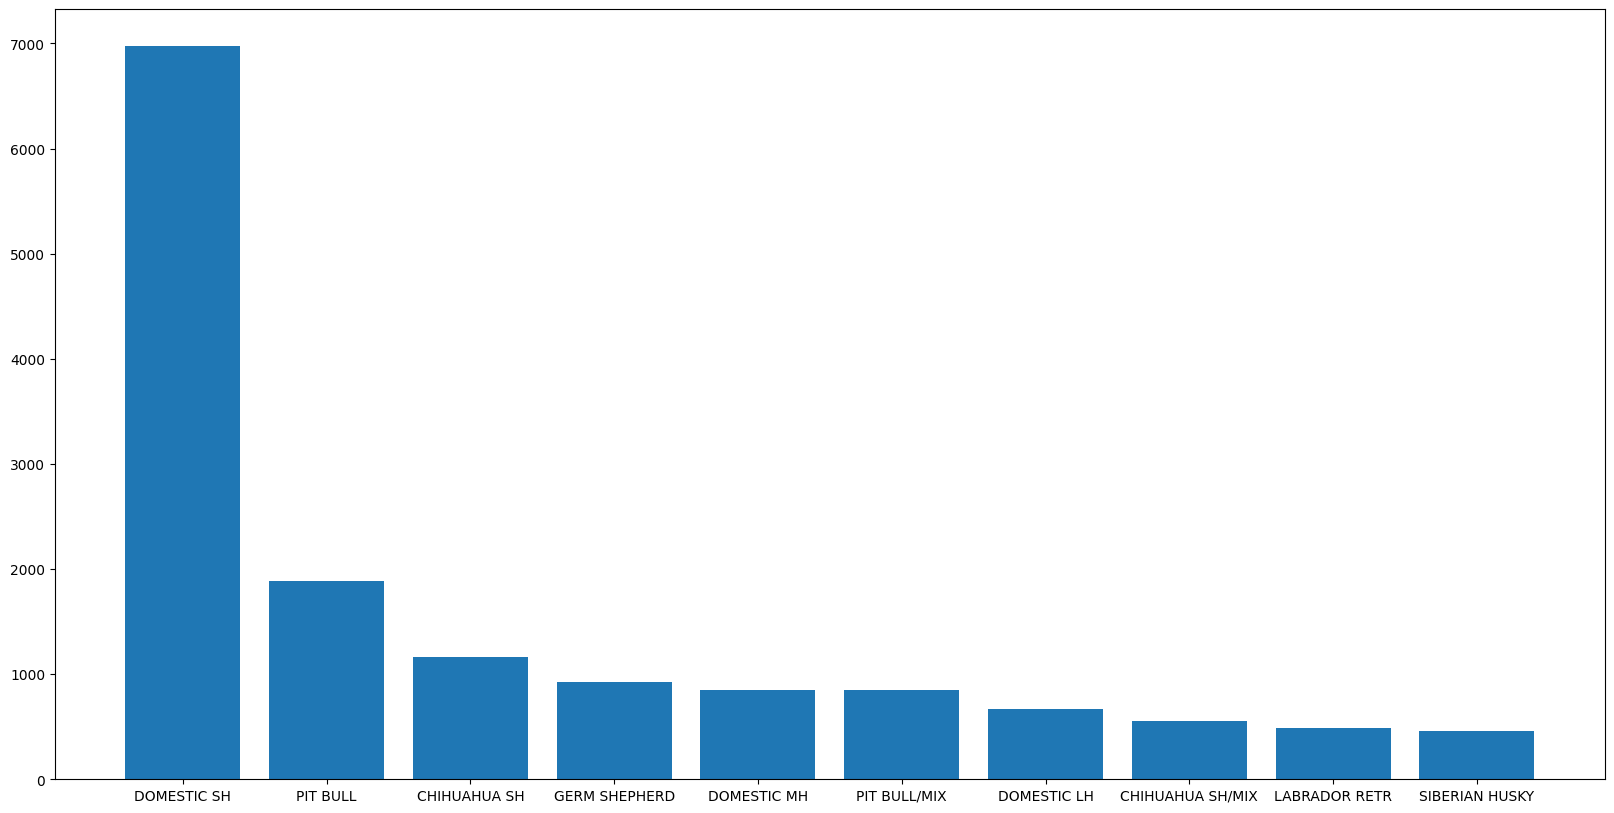

In [16]:
topTenBreeds = df["Breed"].value_counts().head(10)
topTenBreeds = topTenBreeds.to_dict()
plt.figure(figsize=(20,10))
plt.bar(topTenBreeds.keys(), topTenBreeds.values())
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.bar(df['Color'], df['Days in Shelter'])
# plt.xlabel('Kolor psa')
# plt.ylabel('Dni w schronisku')
# plt.title('Zależność dni w schronisku względem koloru psa')
# plt.xticks(rotation=45)
# plt.show()


In [18]:
df = df.drop('Outcome Zip Code', axis=1)
df = df.drop('Intake Date', axis=1)
df = df.drop('Outcome Date', axis=1)
df = df.drop('Outcome Type', axis=1)
df = df.drop('Outcome Subtype', axis=1)
df = df.drop('Kennel Number', axis=1)
df = df.drop('Intake Jurisdiction', axis=1)
df = df.drop('Name', axis=1)

In [19]:
df = df.drop('Outcome Condition', axis=1)
df = df.drop('Outcome Jurisdiction', axis=1)
df = df.drop('Count', axis=1)

In [20]:
df.drop(df[df["Days in Shelter"] == "0"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
1,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,3,STRAY,OVER THE COUNTER,UNKNOWN
2,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,3,STRAY,OVER THE COUNTER,UNKNOWN
3,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,3,STRAY,OVER THE COUNTER,UNKNOWN
4,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,3,STRAY,FIELD,UNKNOWN
7,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,06/26/2011,4,STRAY,FIELD,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
25430,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,20,STRAY,OVER THE COUNTER,HEALTHY
25431,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,112,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,21,STRAY,OVER THE COUNTER,UNTREATABLE
25433,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,49,STRAY,FIELD,HEALTHY


In [21]:
df["Sex"].unique()

array(['Neutered', 'Female', 'Spayed', 'Male', 'Unknown'], dtype=object)

In [22]:
df = df.replace("Neutered", "Male")
df = df.replace("Spayed", "Female")

In [23]:
df["Size"].unique()

array(['MED', 'SMALL', 'KITTN', 'LARGE', 'X-LRG', 'PUPPY', 'TOY', nan],
      dtype=object)

In [24]:
df = df.replace("KITTN", "SMALL")
df = df.replace("PUPPY", "SMALL")
df = df.replace("TOY", "SMALL")
df = df.replace("MED", "MEDIUM")
df = df.replace("X-LRG", "LARGE")
df['Size'] = df['Size'].fillna("MEDIUM")

In [25]:
df["Size"].unique()

array(['MEDIUM', 'SMALL', 'LARGE'], dtype=object)

In [26]:
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
1,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Male,MEDIUM,NaN,3,STRAY,OVER THE COUNTER,UNKNOWN
2,DOG,SIBERIAN HUSKY/MIX,RED,Female,MEDIUM,NaN,3,STRAY,OVER THE COUNTER,UNKNOWN
3,DOG,GERM SHEPHERD,BLACK/BROWN,Male,MEDIUM,NaN,3,STRAY,OVER THE COUNTER,UNKNOWN
4,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,3,STRAY,FIELD,UNKNOWN
7,CAT,DOMESTIC LH,GRAY/WHITE,Female,SMALL,06/26/2011,4,STRAY,FIELD,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
25430,CAT,DOMESTIC SH,GRAY/WHITE,Male,SMALL,10/15/2017,20,STRAY,OVER THE COUNTER,HEALTHY
25431,OTHER,AMERICAN,WHITE/BROWN,Female,SMALL,11/08/2017,112,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,12/22/2012,21,STRAY,OVER THE COUNTER,UNTREATABLE
25433,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Male,SMALL,07/28/2011,49,STRAY,FIELD,HEALTHY


In [27]:
df.drop(df[df["Intake Condition"] == "UNKNOWN"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,07/06/2018,4,STRAY,OVER THE COUNTER,HEALTHY
16,CAT,DOMESTIC SH,BLACK,Female,SMALL,07/14/2022,63,STRAY,OVER THE COUNTER,HEALTHY
19,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,08/29/2022,59,STRAY,OVER THE COUNTER,HEALTHY
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,01/12/2022,45,STRAY,OVER THE COUNTER,HEALTHY
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,04/10/2022,33,OWNER SURRENDER,OVER THE COUNTER,HEALTHY
...,...,...,...,...,...,...,...,...,...,...
25429,DOG,AUST CATTLE DOG,TAN/BLACK,Unknown,SMALL,02/21/2022,2,STRAY,BORN_HERE,TREATABLE/REHAB
25430,CAT,DOMESTIC SH,GRAY/WHITE,Male,SMALL,10/15/2017,20,STRAY,OVER THE COUNTER,HEALTHY
25431,OTHER,AMERICAN,WHITE/BROWN,Female,SMALL,11/08/2017,112,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,12/22/2012,21,STRAY,OVER THE COUNTER,UNTREATABLE


In [28]:
sorted(df["Color"].unique())

['AGOUTI',
 'APRICOT',
 'APRICOT/WHITE',
 'BL BRINDLE',
 'BL BRINDLE/GRAY',
 'BL BRINDLE/TAN',
 'BL BRINDLE/WHITE',
 'BLACK',
 'BLACK/BL BRINDLE',
 'BLACK/BLACK',
 'BLACK/BLK SMOKE',
 'BLACK/BLK TABBY',
 'BLACK/BLUE MERLE',
 'BLACK/BLUE TICK',
 'BLACK/BR BRINDLE',
 'BLACK/BRN MERLE',
 'BLACK/BROWN',
 'BLACK/CHOCOLATE',
 'BLACK/CREAM',
 'BLACK/GOLD',
 'BLACK/GRAY',
 'BLACK/RED',
 'BLACK/SILVER',
 'BLACK/TAN',
 'BLACK/TRICOLOR',
 'BLACK/WHITE',
 'BLACK/YELLOW',
 'BLK SMOKE',
 'BLK SMOKE/WHITE',
 'BLK TABBY',
 'BLK TABBY/GRAY',
 'BLK TABBY/TORTIE',
 'BLK TABBY/WHITE',
 'BLK TIGER/TAN',
 'BLONDE',
 'BLUE',
 'BLUE CREAM',
 'BLUE CREAM/BRN TABBY',
 'BLUE CREAM/CALICO',
 'BLUE CREAM/TORTIE',
 'BLUE CREAM/WHITE',
 'BLUE MERLE',
 'BLUE MERLE/BLACK',
 'BLUE MERLE/GRAY',
 'BLUE MERLE/TAN',
 'BLUE MERLE/WHITE',
 'BLUE PT',
 'BLUE PT/WHITE',
 'BLUE TABBY',
 'BLUE TICK',
 'BLUE TICK/BLACK',
 'BLUE TIGER',
 'BLUE/BL BRINDLE',
 'BLUE/BLACK',
 'BLUE/BLUE',
 'BLUE/BR BRINDLE',
 'BLUE/BROWN',
 'BLUE/FAWN

In [29]:
len(df["Color"].unique())

295

In [30]:
def check_and_replace_color(colors):
    unique_colors = {}
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2:
            reversed_color = "/".join(reversed(parts))
            if reversed_color in unique_colors:
                unique_colors[color] = unique_colors[reversed_color]
            else:
                unique_colors[color] = color
        else:
            unique_colors[color] = color
    
    updated_colors = [unique_colors[color] for color in colors]
    return updated_colors

In [31]:
def replace_same_colors(colors):
    updated_colors = []
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2 and parts[0] == parts[1]:
            updated_colors.append(parts[0])
        else:
            updated_colors.append(color)
    
    return updated_colors

In [32]:
not_fixed_colors = df["Color"].copy()
df["Color"] = check_and_replace_color(df["Color"])
df["Color"] = replace_same_colors(df["Color"])

In [33]:
len(not_fixed_colors.unique())

295

In [34]:
len(df["Color"].unique())

223

In [35]:
unique_colors_before = not_fixed_colors.unique()
unique_colors_after = df["Color"].unique()

In [36]:
diff = len(unique_colors_before) - len(unique_colors_after)

tmp = list(unique_colors_after)
for i in range(diff):
    tmp.append(0)
    
unique_colors_after = np.asarray(tmp)

data = {
    "Before": unique_colors_before,
    "After": unique_colors_after
}

df_for_colors_check = pd.DataFrame(data)
df_for_colors_check
df_for_colors_check.to_csv("./test_data/test.csv")

In [37]:
df["Intake Condition"].unique()

array(['HEALTHY', 'TREATABLE/MANAGEABLE', 'TREATABLE/REHAB',
       'UNTREATABLE'], dtype=object)

In [38]:
df = df.replace("TREATABLE/MANAGEABLE", "TREATABLE")
df = df.replace("TREATABLE/REHAB", "TREATABLE")

In [39]:
# df[df["Days in Shelter"].str.contains(",")]

In [40]:
# df['Days in Shelter'] = df['Days in Shelter'].str.replace(',', '')

In [41]:
# df[df["Days in Shelter"].str.contains(",")]

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


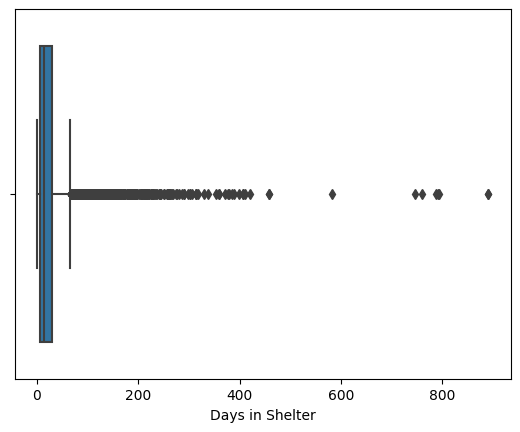

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Days in Shelter"] = df["Days in Shelter"].astype(float)
sns.boxplot(x=df["Days in Shelter"])
plt.show()


In [43]:
df[df["Days in Shelter"] > 50].count()

Type                1723
Breed               1723
Color               1723
Sex                 1723
Size                1723
Date Of Birth       1617
Days in Shelter     1723
Intake Type         1723
Intake Subtype      1723
Intake Condition    1723
dtype: int64

In [44]:
df.drop(df[df["Days in Shelter"] > 50].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,07/06/2018,4.0,STRAY,OVER THE COUNTER,HEALTHY
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,01/12/2022,45.0,STRAY,OVER THE COUNTER,HEALTHY
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,04/10/2022,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,06/28/2006,1.0,STRAY,FIELD,HEALTHY
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,10/31/2014,1.0,STRAY,FIELD,HEALTHY
...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,05/12/2014,5.0,STRAY,COMM CAT,HEALTHY
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,02/21/2022,2.0,STRAY,BORN_HERE,TREATABLE
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,10/15/2017,20.0,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,12/22/2012,21.0,STRAY,OVER THE COUNTER,UNTREATABLE


c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


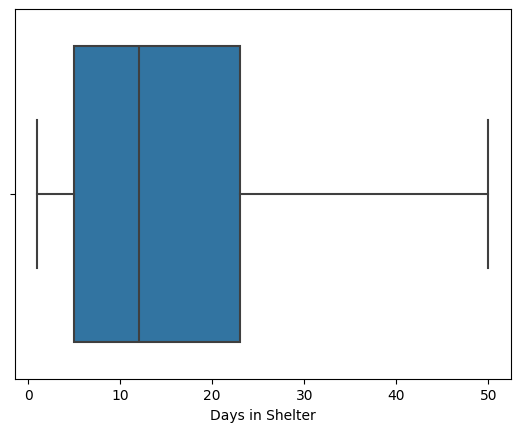

In [45]:
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [46]:
df.isnull().sum()

Type                   0
Breed                  0
Color                  0
Sex                    0
Size                   0
Date Of Birth       2458
Days in Shelter        0
Intake Type            0
Intake Subtype         0
Intake Condition       0
dtype: int64

In [47]:
from datetime import datetime

df.dropna(subset=['Date Of Birth'], inplace=True)
current_year = datetime.now().year
df["Date Of Birth"] = pd.to_datetime(df["Date Of Birth"])
df['Age'] = (current_year - df['Date Of Birth'].dt.year.astype(int))
df.drop(['Date Of Birth'], axis=1, inplace=True)
df

,Type,Breed,Color,Sex,Size,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,5.0,STRAY,COMM CAT,HEALTHY,9
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,2.0,STRAY,BORN_HERE,TREATABLE,1
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


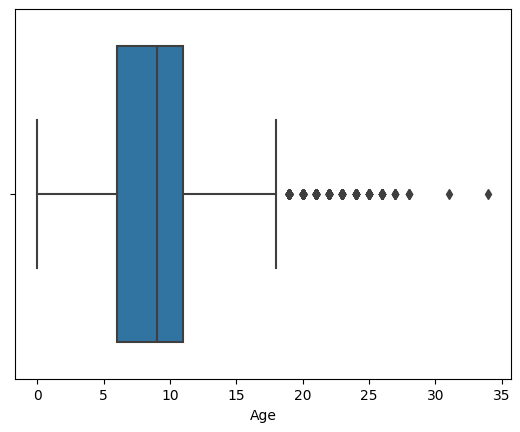

In [48]:
sns.boxplot(x=df["Age"])
plt.show()

In [49]:
df.drop(df[df["Age"] > 20].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,5.0,STRAY,COMM CAT,HEALTHY,9
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,2.0,STRAY,BORN_HERE,TREATABLE,1
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


In [50]:
df

,Type,Breed,Color,Sex,Size,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,5.0,STRAY,COMM CAT,HEALTHY,9
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,2.0,STRAY,BORN_HERE,TREATABLE,1
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


In [51]:
df.drop(df[df["Sex"] == "Unknown"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...
25426,DOG,PIT BULL,BLUE/WHITE,Female,MEDIUM,16.0,STRAY,FIELD,HEALTHY,8
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,5.0,STRAY,COMM CAT,HEALTHY,9
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


In [52]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'ENGLISH SPOT/MIX',
       'HAVANA/MIX', 'POTBELLY PIG', 'RABBIT LH', 'JERSEY/MIX',
       'LOP-MINI/MIX', 'REX', 'REX/MIX', 'GOAT', 'CHICKEN',
       'CALIFORNIAN/MIX', 'RAT', 'LOP-MINI', 'LOP-FRENCH', 'SILVER',
       'GOAT/LA MANCHA', 'AMERICAN/REX', 'RHINELANDER/MIX', 'HOTOT',
       'SHEEP', 'ANGORA-ENGLISH', 'HARLEQUIN/MIX', 'DUTCH/MIX', 'BOER',
       'HOTOT/MIX', 'NETHERLND DWARF/MIX', 'COCKATIEL', 'HIMALAYAN/MIX',
       'DUTCH', 'PALOMINO', 'HORSE', 'LOP-ENGLISH/MIX',
       'ANGORA-SATIN/MIX', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN',
       'LOP-HOLLAND/MIX', 'CALIFORNIAN', 'REX-MINI/MIX', 'LOP-ENGLISH',
       'GOAT/ALPINE', 'PALOMINO/MIX', 'CANARY', 'DOVE', 'BARRED ROCK',
       'LOP-AMER FUZZY/MIX', 'RABBIT LH/MIX', 'ENGLISH SPOT', 'MOUSE',
       'GOAT/NUBIAN'], dtype=object)

In [53]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "PALOMINO/MIX"), "Breed"] = "PALOMINO"

In [54]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'ENGLISH SPOT/MIX',
       'HAVANA/MIX', 'POTBELLY PIG', 'RABBIT LH', 'JERSEY/MIX',
       'LOP-MINI/MIX', 'REX', 'REX/MIX', 'GOAT', 'CHICKEN',
       'CALIFORNIAN/MIX', 'RAT', 'LOP-MINI', 'LOP-FRENCH', 'SILVER',
       'GOAT/LA MANCHA', 'AMERICAN/REX', 'RHINELANDER/MIX', 'HOTOT',
       'SHEEP', 'ANGORA-ENGLISH', 'HARLEQUIN/MIX', 'DUTCH/MIX', 'BOER',
       'HOTOT/MIX', 'NETHERLND DWARF/MIX', 'COCKATIEL', 'HIMALAYAN/MIX',
       'DUTCH', 'PALOMINO', 'HORSE', 'LOP-ENGLISH/MIX',
       'ANGORA-SATIN/MIX', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN',
       'LOP-HOLLAND/MIX', 'CALIFORNIAN', 'REX-MINI/MIX', 'LOP-ENGLISH',
       'GOAT/ALPINE', 'CANARY', 'DOVE', 'BARRED ROCK',
       'LOP-AMER FUZZY/MIX', 'RABBIT LH/MIX', 'ENGLISH SPOT', 'MOUSE',
       'GOAT/NUBIAN'], dtype=object)

In [55]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("MIX")), "Breed"] = "MIX"

In [56]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'MIX', 'POTBELLY PIG',
       'RABBIT LH', 'REX', 'GOAT', 'CHICKEN', 'RAT', 'LOP-MINI',
       'LOP-FRENCH', 'SILVER', 'GOAT/LA MANCHA', 'AMERICAN/REX', 'HOTOT',
       'SHEEP', 'ANGORA-ENGLISH', 'BOER', 'COCKATIEL', 'DUTCH',
       'PALOMINO', 'HORSE', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN',
       'CALIFORNIAN', 'LOP-ENGLISH', 'GOAT/ALPINE', 'CANARY', 'DOVE',
       'BARRED ROCK', 'ENGLISH SPOT', 'MOUSE', 'GOAT/NUBIAN'],
      dtype=object)

In [57]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("GOAT")), "Breed"] = "GOAT"

In [58]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'MIX', 'POTBELLY PIG',
       'RABBIT LH', 'REX', 'GOAT', 'CHICKEN', 'RAT', 'LOP-MINI',
       'LOP-FRENCH', 'SILVER', 'AMERICAN/REX', 'HOTOT', 'SHEEP',
       'ANGORA-ENGLISH', 'BOER', 'COCKATIEL', 'DUTCH', 'PALOMINO',
       'HORSE', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN', 'CALIFORNIAN',
       'LOP-ENGLISH', 'CANARY', 'DOVE', 'BARRED ROCK', 'ENGLISH SPOT',
       'MOUSE'], dtype=object)

In [59]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "AMERICAN/REX"), "Breed"] = "MIX"

In [60]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'MIX', 'POTBELLY PIG',
       'RABBIT LH', 'REX', 'GOAT', 'CHICKEN', 'RAT', 'LOP-MINI',
       'LOP-FRENCH', 'SILVER', 'HOTOT', 'SHEEP', 'ANGORA-ENGLISH', 'BOER',
       'COCKATIEL', 'DUTCH', 'PALOMINO', 'HORSE', 'LOP-HOLLAND',
       'RACCOON', 'AMERICAN', 'CALIFORNIAN', 'LOP-ENGLISH', 'CANARY',
       'DOVE', 'BARRED ROCK', 'ENGLISH SPOT', 'MOUSE'], dtype=object)

In [61]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(["RABBIT SH", "RABBIT LH"])), "Breed"] = "RABBIT"

In [62]:
rabbit_breeds = ["LOP-AMER FUZZY",
                    "LOP-HOLLAND",
                    "RABBIT",
                    "DWARF HOTOT",
                    "MIX",
                    "REX",
                    "LOP-MINI",
                    "LOP-FRENCH",
                    "SILVER",
                    "HOTOT",
                    "ANGORA-ENGLISH",
                    "DUTCH",
                    "AMERICAN",
                    "CALIFORNIAN",
                    "LOP-ENGLISH",
                    "ENGLISH SPOT"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(rabbit_breeds)), "Breed"] = "RABBIT"

roden_breeds = ["GUINEA PIG",
                "HAMSTER",
                "RAT",
                "MOUSE"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(roden_breeds)), "Breed"] = "RODENT"

live_stock_breeds = ["GOAT",
                    "CHICKEN",
                    "SHEEP",
                    "BOER",
                    "BARRED ROCK"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(live_stock_breeds)), "Breed"] = "LIVESTOCK"

bird_breeds = ["PARAKEET",
                "COCKATIEL",
                "CANARY",
                "DOVE"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(bird_breeds)), "Breed"] = "BIRD"

horse_breeds = ["HORSE",
                "SHETLAND",
                "PALOMINO"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(horse_breeds)), "Breed"] = "HORSE"

if "RACCOON" in df["Breed"].values:
    df.loc[df["Breed"] == "RACCOON", "Type"] = "RACCOON"

In [63]:
dog_types = df[df["Type"] == "DOG"]
sorted(dog_types["Breed"].unique())

['AFFENPINSCHER',
 'AIREDALE TERR',
 'AIREDALE TERR/MIX',
 'AKBASH',
 'AKBASH/MIX',
 'AKITA',
 'AKITA/ALASKAN HUSKY',
 'AKITA/GERM SHEPHERD',
 'AKITA/LABRADOR RETR',
 'AKITA/MIX',
 'ALASK KLEE KAI',
 'ALASK MALAMUTE',
 'ALASKAN HUSKY',
 'ALASKAN HUSKY/AUST SHEPHERD',
 'ALASKAN HUSKY/BEAGLE',
 'ALASKAN HUSKY/BORDER COLLIE',
 'ALASKAN HUSKY/GERM SHEPHERD',
 'ALASKAN HUSKY/LABRADOR RETR',
 'ALASKAN HUSKY/MIX',
 'ALASKAN HUSKY/PIT BULL',
 'ALASKAN HUSKY/SHIBA INU',
 'AM PIT BULL TER',
 'AM PIT BULL TER/MIX',
 'AMER BULLDOG',
 'AMER BULLDOG/BOXER',
 'AMER BULLDOG/MIX',
 'AMER BULLDOG/PIT BULL',
 'AMER ESKIMO',
 'AMER ESKIMO/MIX',
 'AMER FOXHOUND',
 'AMER FOXHOUND/GREAT PYRENEES',
 'AMER FOXHOUND/WHIPPET',
 'AMERICAN STAFF',
 'AMERICAN STAFF/CHIHUAHUA SH',
 'AMERICAN STAFF/GERM SHEPHERD',
 'AMERICAN STAFF/MIX',
 'AMERICAN STAFF/PIT BULL',
 'ANATOL SHEPHERD',
 'ANATOL SHEPHERD/MIX',
 'AUST CATTLE DOG',
 'AUST CATTLE DOG/BELG MALINOIS',
 'AUST CATTLE DOG/BORDER COLLIE',
 'AUST CATTLE DOG/CATAH

In [64]:
len(dog_types["Breed"].unique())

596

In [65]:
df.loc[(df["Type"] == "DOG") & (df["Breed"].str.contains("/")), "Breed"] = "MIX"

In [66]:
dog_types = df[df["Type"] == "DOG"]
len(dog_types["Breed"].unique())

122

In [67]:
df.isnull().sum()

Type                0
Breed               0
Color               0
Sex                 0
Size                0
Days in Shelter     0
Intake Type         0
Intake Subtype      0
Intake Condition    0
Age                 0
dtype: int64

In [68]:
decision = df["Days in Shelter"].astype(float)
attributes = df.drop("Days in Shelter", axis=1)


In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

attributes = pd.get_dummies(attributes)

In [70]:
attributes = attributes.astype(int)

In [71]:
attributes

,Age,Type_CAT,Type_DOG,Type_OTHER,Type_RACCOON,Breed_ABYSSINIAN,Breed_ABYSSINIAN/MIX,Breed_AFFENPINSCHER,Breed_AIREDALE TERR,Breed_AKBASH,...,Intake Subtype_OVER THE COUNTER_OWNED,Intake Subtype_OVER THE COUNTER_RETURN TO OWNER,Intake Subtype_OVER THE COUNTER_STRAY,Intake Subtype_PHONE,Intake Subtype_PRIV_SHELT,Intake Subtype_RESCUE_GRP,Intake Subtype_VET_HOSP,Intake Condition_HEALTHY,Intake Condition_TREATABLE,Intake Condition_UNTREATABLE
9,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40,17,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25426,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25427,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25430,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25432,11,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
decision

9         4.0
24       45.0
25       33.0
40        1.0
43        1.0
         ... 
25426    16.0
25427     5.0
25430    20.0
25432    21.0
25433    49.0
Name: Days in Shelter, Length: 10588, dtype: float64

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

attributes = scaler.fit_transform(attributes)

In [77]:
attributes

array([[-0.99576213,  1.30979697, -1.2252752 , ...,  0.56498899,
        -0.45877245, -0.27031806],
       [-1.99757983,  1.30979697, -1.2252752 , ...,  0.56498899,
        -0.45877245, -0.27031806],
       [-1.99757983,  1.30979697, -1.2252752 , ...,  0.56498899,
        -0.45877245, -0.27031806],
       ...,
       [-0.74530771,  1.30979697, -1.2252752 , ...,  0.56498899,
        -0.45877245, -0.27031806],
       [ 0.50696441, -0.76347711,  0.81614318, ..., -1.76994599,
        -0.45877245,  3.69934582],
       [ 0.75741884, -0.76347711,  0.81614318, ...,  0.56498899,
        -0.45877245, -0.27031806]])

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attributes, decision, test_size=0.25, random_state=42)

In [ ]:
def graph_for_model(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, c='b', marker='o', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('MODEL - {model_name}'.format(model_name=model_name))
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.show()

Random forest

In [ ]:
# send_message_to_telegram("Starting training")

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error

# model_LinearRegression = LinearRegression()
# model_LinearRegression.fit(X_train, y_train)
# y_pred_LinearRegression = model_LinearRegression.predict(X_test)
# mse_LinearRegression = mean_squared_error(y_test, y_pred_LinearRegression)
# r2_LinearRegression = r2_score(y_test, y_pred_LinearRegression)

# rounded_mse_LinearRegression = str(round(mse_LinearRegression, 3))
# rounded_r2_LinearRegression = str(round(r2_LinearRegression, 3))

# print("Mean Squared Error:", rounded_mse_LinearRegression)
# print("R^2 Score:", rounded_r2_LinearRegression)

In [ ]:
# graph_for_model(y_test, y_pred_LinearRegression, "Linear Regression")

In [ ]:
# from sklearn.linear_model import Ridge, Lasso, BayesianRidge

# model_Ridge = Ridge()
# model_Ridge.fit(X_train, y_train)
# y_pred_Ridge = model_Ridge.predict(X_test)
# mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)
# r2_Ridge = r2_score(y_test, y_pred_Ridge)

# rounded_mse_Ridge = str(round(mse_Ridge, 3))
# rounded_r2_Ridge = str(round(r2_Ridge, 3))

# print("Mean Squared Error:", rounded_mse_Ridge)
# print("R^2 Score:", rounded_r2_Ridge)

In [ ]:
# graph_for_model(y_test, y_pred_Ridge, "Ridge")

In [ ]:
# model_Lasso = Lasso()
# model_Lasso.fit(X_train, y_train)
# y_pred_Lasso = model_Lasso.predict(X_test)
# mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
# r2_Lasso = r2_score(y_test, y_pred_Lasso)

# rounded_mse_Lasso = str(round(mse_Lasso, 3))
# rounded_r2_Lasso = str(round(r2_Lasso, 3))

# print("Mean Squared Error:", rounded_mse_Lasso)
# print("R^2 Score:", rounded_r2_Lasso)

In [ ]:
# graph_for_model(y_test, y_pred_Ridge, "Ridge")

In [ ]:
# model_BayesianRidge = BayesianRidge()
# model_BayesianRidge.fit(X_train, y_train)
# y_pred_BayesianRidge = model_BayesianRidge.predict(X_test)
# mse_BayesianRidge = mean_squared_error(y_test, y_pred_BayesianRidge)
# r2_BayesianRidge = r2_score(y_test, y_pred_BayesianRidge)

# rounded_mse_BayesianRidge = str(round(mse_BayesianRidge, 3))
# rounded_r2_BayesianRidge = str(round(r2_BayesianRidge, 3))

# print("Mean Squared Error:", rounded_mse_BayesianRidge)
# print("R^2 Score:", rounded_r2_BayesianRidge)

In [ ]:
# graph_for_model(y_test, y_pred_BayesianRidge, "BayesianRidge")

In [ ]:
# from sklearn.svm import SVR

# model_SVR = SVR(kernel="rbf")
# model_SVR.fit(X_train, y_train)
# y_pred_SVR = model_SVR.predict(X_test)
# mse_SVR = mean_squared_error(y_test, y_pred_SVR)
# r2_SVR = r2_score(y_test, y_pred_SVR)

# rounded_mse_SVR = str(round(mse_SVR, 3))
# rounded_r2_SVR = str(round(r2_SVR, 3))

# print("Mean Squared Error:", rounded_mse_SVR)
# print("R^2 Score:", rounded_r2_SVR)

In [ ]:
# graph_for_model(y_test, y_pred_SVR, "SVR")

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# model_DecisionTreeRegressor = DecisionTreeRegressor()
# model_DecisionTreeRegressor.fit(X_train, y_train)
# y_pred_DecisionTreeRegressor = model_DecisionTreeRegressor.predict(X_test)
# mse_DecisionTreeRegressor = mean_squared_error(y_test, y_pred_DecisionTreeRegressor)
# r2_DecisionTreeRegressor = r2_score(y_test, y_pred_DecisionTreeRegressor)

# rounded_mse_DecisionTreeRegressor = str(round(mse_DecisionTreeRegressor, 3))
# rounded_r2_DecisionTreeRegressor = str(round(r2_DecisionTreeRegressor, 3))

# print("Mean Squared Error:", rounded_mse_DecisionTreeRegressor)
# print("R^2 Score:", rounded_r2_DecisionTreeRegressor)

In [ ]:
# graph_for_model(y_test, y_pred_DecisionTreeRegressor, "DecisionTreeRegressor")

NN

In [78]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              metrics=['mse', 'mae', 'mape'],
              loss='mae')

epochs = 10

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
249/249 [==============================] - 9s 23ms/step - loss: 17.6736 - mse: 348.2926 - mae: 14.0738 - mape: 110.7101 - val_loss: 13.3155 - val_mse: 200.8013 - val_mae: 10.4674 - val_mape: 147.1738
Epoch 2/10
249/249 [==============================] - 4s 17ms/step - loss: 13.2558 - mse: 190.5817 - mae: 10.4849 - mape: 172.8951 - val_loss: 12.3263 - val_mse: 161.0273 - val_mae: 9.6779 - val_mape: 173.4270
Epoch 3/10
249/249 [==============================] - 5s 19ms/step - loss: 12.4979 - mse: 170.5490 - mae: 9.9851 - mape: 180.8911 - val_loss: 11.9129 - val_mse: 154.2080 - val_mae: 9.5353 - val_mape: 176.4035
Epoch 4/10
249/249 [==============================] - 4s 17ms/step - loss: 11.9725 - mse: 162.6776 - mae: 9.7182 - mape: 175.6186 - val_loss: 11.6906 - val_mse: 157.0429 - val_mae: 9.5637 - val_mape: 176.7218
Epoch 5/10
249/249 [==============================] - 3s 14ms/step - loss: 11.6126 - mse: 160.0298 - mae: 9.6015 - mape: 175.1384 - val_loss: 11.3661 - val_mse: 

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adagrad',
              metrics=['mse', 'mae', 'mape'],
              loss='mae')

epochs = 10

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
249/249 [==============================] - 6s 16ms/step - loss: 24.4056 - mse: 449.2957 - val_loss: 23.8123 - val_mse: 426.5210
Epoch 2/10
249/249 [==============================] - 4s 15ms/step - loss: 23.8729 - mse: 437.8841 - val_loss: 23.3372 - val_mse: 415.8459
Epoch 3/10
249/249 [==============================] - 4s 16ms/step - loss: 23.4584 - mse: 430.5385 - val_loss: 22.8513 - val_mse: 407.6029
Epoch 4/10
249/249 [==============================] - 3s 13ms/step - loss: 23.0580 - mse: 422.7631 - val_loss: 22.4953 - val_mse: 400.5810
Epoch 5/10
249/249 [==============================] - 4s 14ms/step - loss: 22.6852 - mse: 415.3382 - val_loss: 22.0963 - val_mse: 394.6367
Epoch 6/10
249/249 [==============================] - 4s 16ms/step - loss: 22.3381 - mse: 410.6014 - val_loss: 21.7100 - val_mse: 386.1522
Epoch 7/10
249/249 [==============================] - 4s 17ms/step - loss: 21.9934 - mse: 404.2103 - val_loss: 21.3836 - val_mse: 381.5140
Epoch 8/10
249/249 [=======

In [102]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adadelta',
              metrics=['mse', 'mae', 'mape'],
              loss='mae')

epochs = 10

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
249/249 [==============================] - 7s 20ms/step - loss: 24.7751 - mse: 461.4509 - val_loss: 24.1428 - val_mse: 432.8002
Epoch 2/10
249/249 [==============================] - 4s 18ms/step - loss: 24.7230 - mse: 460.5552 - val_loss: 24.1632 - val_mse: 434.2761
Epoch 3/10
249/249 [==============================] - 4s 18ms/step - loss: 24.6766 - mse: 460.8069 - val_loss: 24.1326 - val_mse: 434.6333
Epoch 4/10
249/249 [==============================] - 4s 17ms/step - loss: 24.6184 - mse: 458.7780 - val_loss: 24.1066 - val_mse: 434.7698
Epoch 5/10
249/249 [==============================] - 4s 18ms/step - loss: 24.5794 - mse: 458.6647 - val_loss: 24.0609 - val_mse: 434.3306
Epoch 6/10
249/249 [==============================] - 4s 17ms/step - loss: 24.5367 - mse: 458.3768 - val_loss: 23.9854 - val_mse: 432.7612
Epoch 7/10
249/249 [==============================] - 4s 17ms/step - loss: 24.4798 - mse: 457.3568 - val_loss: 23.9494 - val_mse: 432.4271
Epoch 8/10
249/249 [=======

In [80]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping


model = tf.keras.models.Sequential([
    Dense(512, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),  # Zwiększam wartość Dropout
    Dense(256, activation='relu'),  # Usuwam kernel_initializer i kernel_regularizer
    BatchNormalization(),
    Dropout(0.5),  # Zwiększam wartość Dropout
    Dense(128, activation='relu'),  # Dodaję kolejną warstwę
    Dense(1)
])

# Learning Rate Scheduler
def lr_scheduler(epoch):
    return 1e-3 * 10**(epoch / 20)

# Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Kompilacja modelu
model.compile(optimizer='nadam',
              metrics=['mse', 'mae', 'mape'],
              loss='mae')

# Ustawienia epok
epochs = 10

# Trening modelu
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(lr_scheduler), early_stopping])


Epoch 1/10
249/249 [==============================] - 12s 21ms/step - loss: 12.7557 - mse: 221.8904 - mae: 11.1923 - mape: 158.1019 - val_loss: 10.8439 - val_mse: 165.7321 - val_mae: 9.6553 - val_mape: 155.7904 - lr: 0.0010
Epoch 2/10
249/249 [==============================] - 5s 21ms/step - loss: 11.1983 - mse: 171.6154 - mae: 9.9761 - mape: 181.3748 - val_loss: 10.6171 - val_mse: 158.0135 - val_mae: 9.3644 - val_mape: 153.5768 - lr: 0.0011
Epoch 3/10
249/249 [==============================] - 5s 21ms/step - loss: 11.0921 - mse: 166.8781 - mae: 9.8099 - mape: 175.5816 - val_loss: 10.6749 - val_mse: 157.2219 - val_mae: 9.3608 - val_mape: 154.2573 - lr: 0.0013
Epoch 4/10
249/249 [==============================] - 5s 20ms/step - loss: 11.0587 - mse: 164.0566 - mae: 9.7159 - mape: 170.7958 - val_loss: 10.7004 - val_mse: 154.8209 - val_mae: 9.3215 - val_mape: 158.0012 - lr: 0.0014
Epoch 5/10
249/249 [==============================] - 5s 20ms/step - loss: 11.0741 - mse: 163.6815 - mae: 9.67

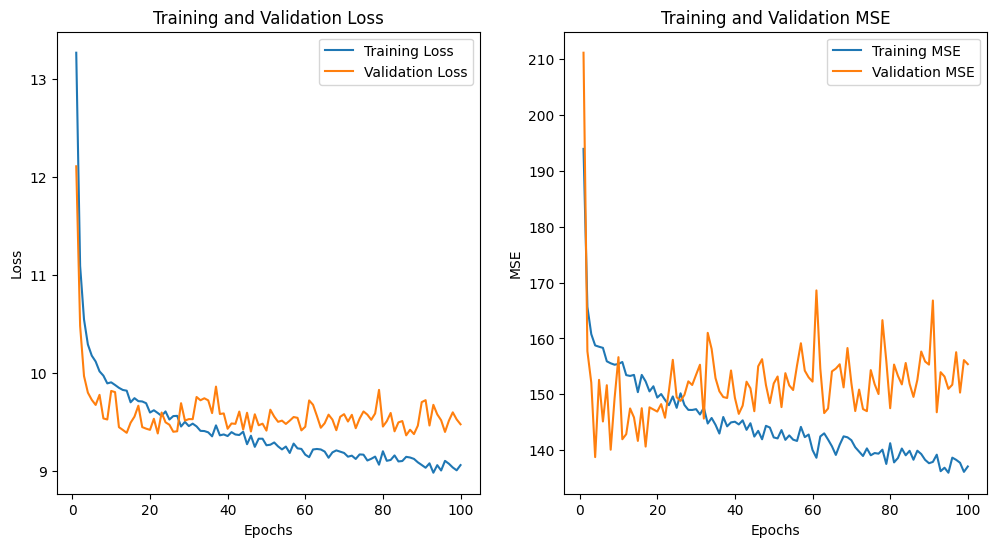

In [81]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['mse'], label='Training MSE')
plt.plot(epochs_range, history.history['val_mse'], label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.show()


In [87]:
y_pred = model.predict(X_test)

y_pred

83/83 [==============================] - 1s 9ms/step


array([[13.090171],
       [15.482333],
       [15.585432],
       ...,
       [13.94461 ],
       [14.245318],
       [11.259094]], dtype=float32)

In [91]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df_pred.to_string(index=False))

 Actual  Predicted
    7.0  13.090171
   28.0  15.482333
   40.0  15.585432
   10.0  13.303529
   27.0  15.726352
   14.0  17.168570
   28.0  12.878736
   38.0  24.175770
    7.0   9.247881
   17.0   9.737809
   22.0   7.710847
    1.0  16.619139
   27.0  10.649216
   20.0   8.626508
   27.0  18.136566
   12.0  11.143435
   13.0   9.411382
    4.0  27.664473
    9.0  11.835254
    3.0   1.863627
   30.0  22.689741
    3.0  12.209037
    7.0   3.433800
    3.0   6.499195
    7.0  16.680281
    1.0   3.116590
   11.0  17.416639
   35.0  12.479062
    6.0  15.581196
   18.0  13.851386
    4.0  20.878674
   11.0  14.598237
    4.0  11.139501
   32.0  12.454753
   10.0   7.803562
    1.0  14.118676
   12.0  14.967184
    3.0  10.534133
   21.0  22.526482
   13.0  13.641365
   19.0   3.992778
   22.0  13.417040
   22.0  16.167194
   26.0  12.906677
   24.0  17.609734
   26.0  29.775352
   38.0   9.844419
   11.0  12.104288
   15.0  12.073731
   13.0   5.230084
   16.0   9.487964
   42.0   8.

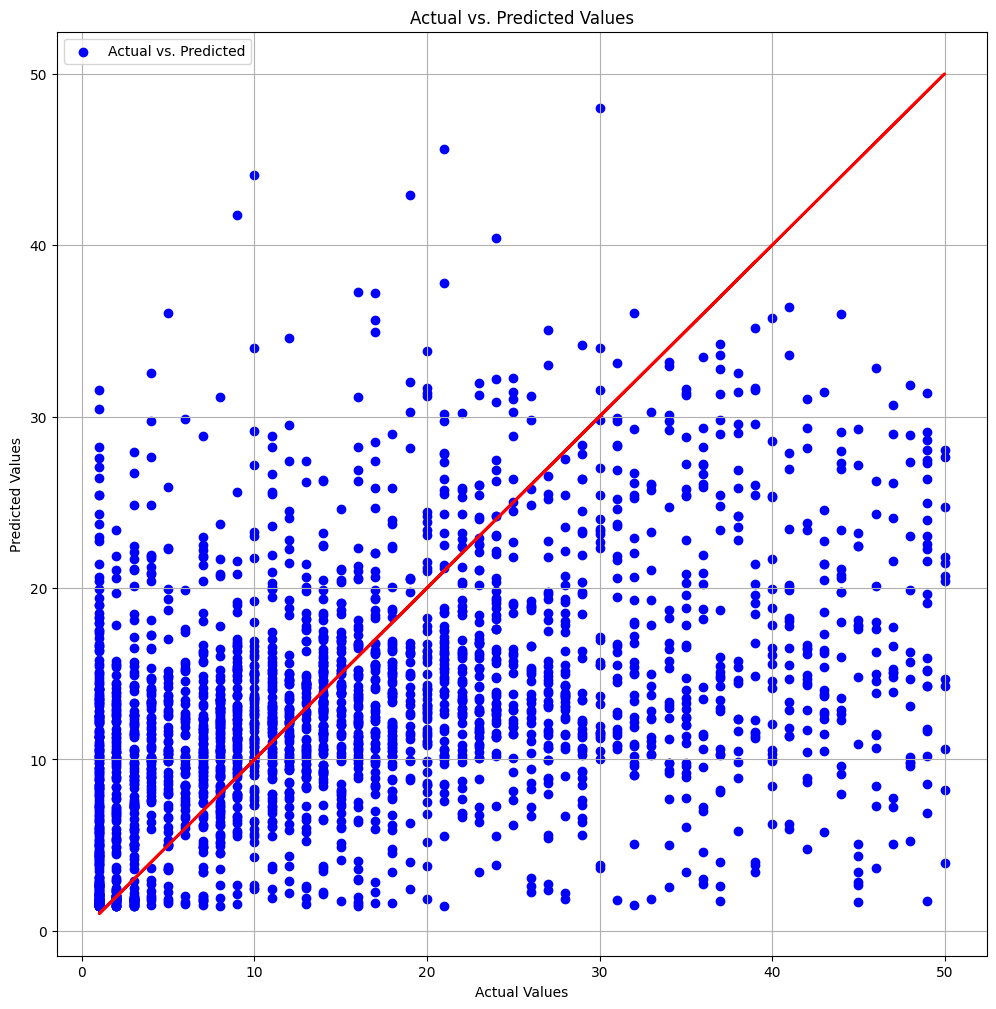

In [95]:
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, c='b', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.show()

In [86]:
import os

folder_path = "./test_data"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Usunięto plik: {filename}")
    except Exception as e:
        print(f"Błąd podczas usuwania pliku {filename}: {e}")

Usunięto plik: test.csv
